# NAME : J MANASA
### ASSIGNMENT :2
### REG NO..:171801120012

                  
# DATASET-1 :Indian Premier League (2008 - 2019)


                                  .. DATASET : Indian Premier League (2008 - 2019)..
  
## ANALYSIS :      

1. Stike rate of top 5 crickter each each of ipl season.

2. Basic Analysis like Teams with maximum matches, wins,etc

3. Batsman Analysis

4. Bowler Analysis

5. 200+ scores analysis

6. Super over

7. Maximum overs

8. Top 10 batsman and bolwers.

9. Best economy bolwers.

10. Highest wicket taker.

11. Total wins for each team through out all seaons.

12. MOST TO LEAST HOSTED GAMES AT EACH CITY AND VENUE.

13. Through out the season winner .

14. Top 10 most " MAN OF THE MATCH " award taker.

15. MI VS CSK (WINS ,MOST MAN OF THE MATCH AWARD TAKER ,etc)

16. Is Toss Winner and the Match Winner are same??

17. 200+ scored batsman and teams.

18. IPL Teams: Winning Percentage

19. Biggest win by runs each season

20. Best Defending Teams

21. Team Total Score and wickets taken by them in all seasons

22. Best fielders in terms of catches seasonwise

23. Best Batsman in terms of season 2019

24.  Batting or bowling first after winning toss

25.  Chances of chasing 200+ target

26. Best defending team...

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
from plotly.graph_objs import *
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from numpy import median
init_notebook_mode(connected=True)
get_ipython().magic('matplotlib inline')
sns.set(style='darkgrid')
fig=plt.gcf()
import plotly.express as px

m = pd.read_csv("matches.csv")
d = pd.read_csv("deliveries.csv")
print(m.shape)
print(d.shape)
ipd1=d.groupby(by='bowler').count()[['player_dismissed']]
ipd2=d.groupby(by='bowler').sum()[['total_runs']]
ipd3=pd.DataFrame(d.groupby(by='bowler')[['match_id']].nunique())
bowler=pd.concat([ipd1,ipd2,ipd3],axis=1)
bowler.shape

(756, 18)
(179078, 21)


(405, 3)

<Figure size 432x288 with 0 Axes>

In [2]:
print(d.batting_team.unique())

['Sunrisers Hyderabad' 'Royal Challengers Bangalore' 'Mumbai Indians'
 'Rising Pune Supergiant' 'Gujarat Lions' 'Kolkata Knight Riders'
 'Kings XI Punjab' 'Delhi Daredevils' 'Chennai Super Kings'
 'Rajasthan Royals' 'Deccan Chargers' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Rising Pune Supergiants' 'Delhi Capitals']


In [3]:

print("Total number of batsmen are :", len(d.batsman.unique()))
print("Total number of bowlewr are :", len(d.bowler.unique()))


Total number of batsmen are : 516
Total number of bowlewr are : 405


In [4]:

print("Number of matches played are :",len(d.match_id.unique()))


Number of matches played are : 756


In [5]:

Matches_at_Venu=m.groupby('venue').count()[['id']].reset_index()



In [6]:

Matches_at_Venu.head(10)


,venue,id
0,ACA-VDCA Stadium,2
1,Barabati Stadium,7
2,Brabourne Stadium,11
3,Buffalo Park,3
4,De Beers Diamond Oval,3
5,Dr DY Patil Sports Academy,17
6,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,11
7,Dubai International Cricket Stadium,7
8,Eden Gardens,77
9,Feroz Shah Kotla,67


# Best Defending Teams

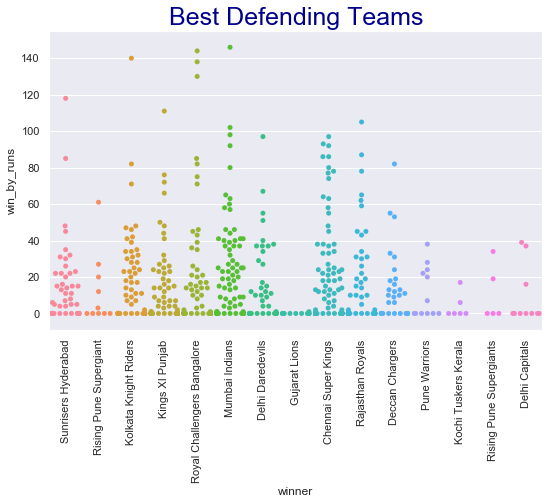

In [7]:
plt.figure(figsize=(8,5))

sns.swarmplot(y='win_by_runs',x='winner',data=m)
plt.tight_layout()
plt.xticks(rotation=90)
plt.title('Best Defending Teams',fontsize=25,color='darkblue')
plt.show()

In [8]:
#Best Fielder in terms of runout
condition = d.dismissal_kind == 'run out'
df = d.loc[condition,:]
#df.groupby(df.fielder).batsman.count().sort_values(ascending=False)
#Best Fielder in terms of catches
condition = (d.dismissal_kind == 'caught and bowled') |(d.dismissal_kind == 'caught')
df = d.loc[condition,:]
#df.groupby(df.fielder).batsman.count().sort_values(ascending=False)
#Best Keeper in terms of catching and stumping
condition = (d.dismissal_kind == 'stumped')
df = d.loc[condition,:]
#df.groupby(df.fielder).batsman.count().sort_values(ascending=False)


# condition = (combined.dismissal_kind != 'run out')&(combined.dismissal_kind != 'retired hurt')&(combined.dismissal_kind != 'notout')
# df = combined.loc[condition,:]
# wicket_series = df.groupby([df.season,df.bowler]).non_striker.count()
# wicket_df = pd.DataFrame(wicket_series)
# wicket_df.reset_index(inplace=True)
# condition = wicket_df.season == 2016
# wicket_df.loc[condition,:].sort_values('non_striker',ascending=False).head(5)


# Best fielders in terms of catches seasonwise

In [9]:
combined = d.set_index('match_id').join(m.set_index('id'),how='inner')

condition = combined.fielder != 'notout'
df = combined.loc[condition,:]
fielders_df = df.groupby([df.season,df.fielder]).non_striker.count()
fielders_df = pd.DataFrame(fielders_df)
fielders_df = fielders_df.reset_index()
condition = fielders_df.season == 2019
fielders_df.loc[condition,:].sort_values('non_striker',ascending=False).head(2)

,season,fielder,non_striker
1563,2019,RR Pant,23
1553,2019,Q de Kock,19


# Best Batsman in terms of season 2019

In [10]:

runs_series = combined.groupby([combined.season,combined.batsman]).total_runs.sum()
runs_df = pd.DataFrame(runs_series)
runs_df.reset_index(inplace=True)
condition = runs_df.season == 2019
runs_df.loc[condition,:].sort_values('total_runs',ascending=False).head(5)

,season,batsman,total_runs
1696,2019,DA Warner,762
1731,2019,KL Rahul,627
1765,2019,Q de Kock,576
1674,2019,AD Russell,576
1780,2019,S Dhawan,561


# Best Wicket tackers in terms of season 2019

In [11]:

condition = (combined.dismissal_kind != 'run out')&(combined.dismissal_kind != 'retired hurt')&(combined.dismissal_kind != 'notout')
df = combined.loc[condition,:]
wicket_series = df.groupby([df.season,df.bowler]).non_striker.count()
wicket_df = pd.DataFrame(wicket_series)
wicket_df.reset_index(inplace=True)
condition = wicket_df.season == 2019
wicket_df.loc[condition,:].sort_values('non_striker',ascending=False).head(5)

,season,bowler,non_striker
1257,2019,DL Chahar,403
1269,2019,Imran Tahir,389
1275,2019,JJ Bumrah,379
1247,2019,B Kumar,366
1313,2019,Rashid Khan,365


# SEASON WISE  TOP 5 STRIKE RATE BY BATSMAN

In [12]:
import pandas as pd
import numpy as np
import plotly.express as px
matches = pd.read_csv("matches.csv")
deliveries = pd.read_csv("deliveries.csv")
aggregatedata = pd.merge(matches,deliveries, left_on = 'id',right_on = 'match_id')
aggregatedata.columns
runs = pd.DataFrame(aggregatedata.groupby(['season','batsman']).agg({'batsman_runs' : 'sum','ball' : 'count'}))
runs['Strike Rate'] = runs['batsman_runs']/runs['ball']*100
runs = runs.sort_values(by =['season','Strike Rate'] , ascending = False)
runs.reset_index(inplace = True)

x=runs

x=x[x["batsman_runs"]>300]
column_names = x.columns
x.sort_values(by=['season','Strike Rate',],inplace=True, ascending=False)
y=pd.DataFrame(columns = column_names)
k=pd.DataFrame()
z=x["season"].unique()
for i in z:
    k=x[x["season"]==i].head(5)
    frames = [y,k]
    y=pd.concat(frames,ignore_index=True)
fig = px.bar(y,x="batsman", y="Strike Rate", title='SEASON WISE  TOP 5 STRIKE RATE BY BATSMAN',color="season",
  animation_frame="season",range_y=[100,250])
fig.show()


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



# Highest Wicket Taker:::: 2008 to 2019

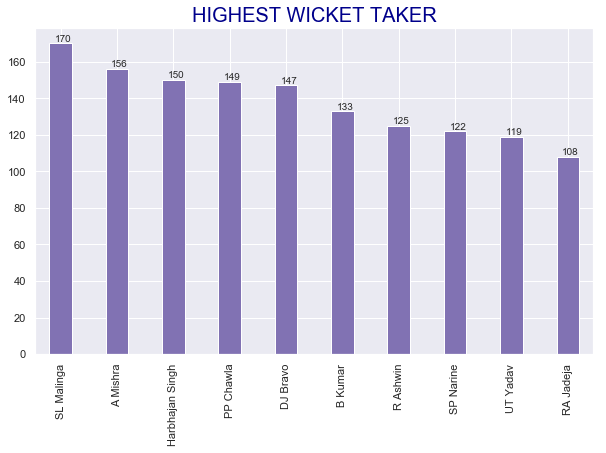

In [13]:
plt.subplots(figsize=(10,6))
dismissal_kinds = ["bowled", "caught", "lbw", "stumped", "caught and bowled", "hit wicket"]  #since run-out is not creditted to the bowler
ct=d[d["dismissal_kind"].isin(dismissal_kinds)]
ax=ct['bowler'].value_counts()[:10].plot.bar(width=0.4,color='m')
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.10, p.get_height()+1))
    
plt.title('HIGHEST WICKET TAKER',fontsize=20,color = 'darkblue')    
plt.show()

 OBSRVATION:Lasith Malinga leads the chart.

# MAXIMUM OVERS:

In [14]:
e=d.groupby(['bowler']).sum()
e['total balls']=d['bowler'].value_counts()
e['overs']=(e['total balls']//6)
e[e['overs']>200].sort_values(by='overs',ascending=0)['overs'].head(5).reset_index()

,bowler,overs
0,Harbhajan Singh,575
1,A Mishra,528
2,PP Chawla,526
3,R Ashwin,502
4,SL Malinga,495


OBSERVATIOIN :Harbhajan Singh bolwed maximum overs.

# Economy Of top 10 bolwers:

In [15]:
e['Economy']=(e['total_runs']/(e['overs']))
e[(e['overs']>300)].sort_values('Economy')[:10].Economy.reset_index().T

,0,1,2,3,4,5,6,7,8,9
bowler,DW Steyn,R Ashwin,SP Narine,Harbhajan Singh,SL Malinga,B Kumar,A Mishra,PP Ojha,Z Khan,P Kumar
Economy,6.68665,6.75498,6.78753,7.04348,7.09293,7.23725,7.29167,7.40432,7.54617,7.61276


OBSERVATION: DW STEYN HAS LEAST ECONOMY .. LOWEST THE ECONOMY VALUE MEANS BEST BOLWER WHO GIVES LOWEST SCORE TO OTHER TEAM. 

# Toss Decisions across  all Seasons(2008-2019)


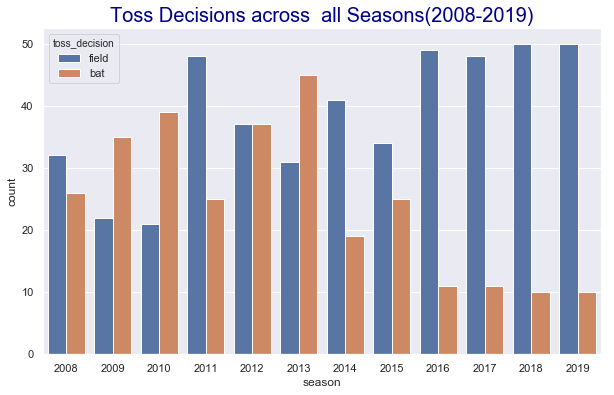

In [16]:

plt.subplots(figsize=(10,6))
sns.countplot(x='season',hue='toss_decision',data=m)
plt.title('Toss Decisions across  all Seasons(2008-2019)',fontsize=20,color ='darkblue')
plt.show()

#  Is Toss Winner and the Match Winner are same??

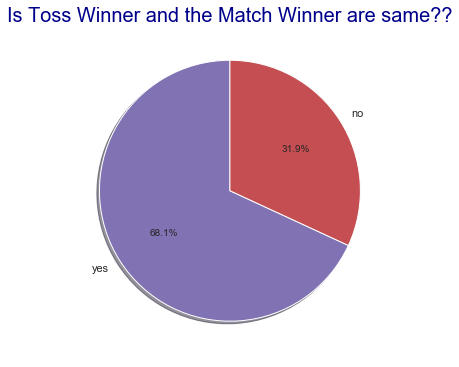

In [17]:
df=m[m['toss_winner']==m['winner']]
slices=[len(df),(577-len(df))]
labels=['yes','no']
plt.pie(slices,labels=labels,startangle=90,shadow=True,explode=(0,0),autopct='%1.1f%%',colors=['m','r'])
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.title('Is Toss Winner and the Match Winner are same??',fontsize=20,color ='darkblue')
plt.show()

 Toss Winner and the Match Winner are 66.1 yes 31.9 no.

In [18]:
print(d.batting_team.unique())

['Sunrisers Hyderabad' 'Royal Challengers Bangalore' 'Mumbai Indians'
 'Rising Pune Supergiant' 'Gujarat Lions' 'Kolkata Knight Riders'
 'Kings XI Punjab' 'Delhi Daredevils' 'Chennai Super Kings'
 'Rajasthan Royals' 'Deccan Chargers' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Rising Pune Supergiants' 'Delhi Capitals']


In [19]:

print("Total number of batsmen are :", len(d.batsman.unique()))
print("Total number of bowlewr are :", len(d.bowler.unique()))


Total number of batsmen are : 516
Total number of bowlewr are : 405


In [20]:

print("Number of matches played are :",len(d.match_id.unique()))


Number of matches played are : 756


In [21]:

Matches_at_Venu=m.groupby('venue').count()[['id']].reset_index()



In [22]:

Matches_at_Venu.head(10)


,venue,id
0,ACA-VDCA Stadium,2
1,Barabati Stadium,7
2,Brabourne Stadium,11
3,Buffalo Park,3
4,De Beers Diamond Oval,3
5,Dr DY Patil Sports Academy,17
6,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,11
7,Dubai International Cricket Stadium,7
8,Eden Gardens,77
9,Feroz Shah Kotla,67


In [25]:
extra_runs = pd.DataFrame(aggregatedata.groupby(['season','team1']).agg({'total_runs' : 'sum','ball' : 'count'}))
extra_runs['run_rate'] =(extra_runs['total_runs']/extra_runs['ball'])*6
extra_runs = extra_runs.sort_values(by =['season','run_rate'] , ascending = False)
extra_runs.reset_index(inplace = True)
extra_runs.head()

,season,team1,total_runs,ball,run_rate
0,2019,Kings XI Punjab,2575,1721,8.977339
1,2019,Kolkata Knight Riders,3174,2165,8.796305
2,2019,Sunrisers Hyderabad,2852,1971,8.681887
3,2019,Royal Challengers Bangalore,2878,1994,8.659980
4,2019,Rajasthan Royals,1677,1166,8.629503


In [26]:
p =d["non_striker"].unique()


# TOTAL WINS BY EACH TEAM

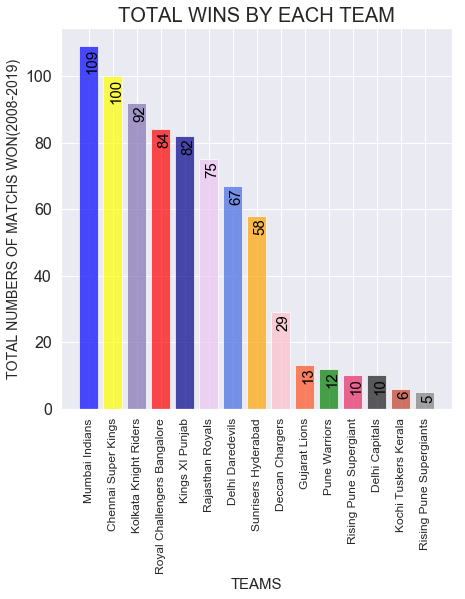

In [70]:
fig.set_size_inches(18.5,10.5)
wins=pd.DataFrame(m['winner'].value_counts())
wins['name']=wins.index
plt.figure(figsize=(7,7))
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=16)
plt.bar(wins['name'],
        wins['winner'],
        color=['blue','yellow','m','red','darkblue','#ECC5F2',
               'royalblue','orange','pink','#FD511F','green','#E82865',
               'k','#C23E25','gray'],alpha=0.7)
count=0
for i in wins['winner']:
    plt.text(count-0.15,i-4,str(i),size=15,color='black',rotation=90)
    count+=1
plt.title('TOTAL WINS BY EACH TEAM',fontsize=20)
plt.xlabel('TEAMS',fontsize=15)
plt.ylabel('TOTAL NUMBERS OF MATCHS WON(2008-2019)',fontsize=14)
plt.show()


In [71]:
total_win=m.groupby(['season','winner']).count()[['id']].reset_index()

In [73]:
team_stats=pd.DataFrame({'TotalMatches': m.team1.value_counts()+m.team2.value_counts()
                         ,'TotalWin':m.winner.value_counts()})
team_stats=team_stats.reset_index()
team_stats.rename(columns={'index':'Teams'},inplace=True)

In [74]:
team_stats.head(10)

,Teams,TotalMatches,TotalWin
0,Chennai Super Kings,164,100
1,Deccan Chargers,75,29
2,Delhi Capitals,16,10
3,Delhi Daredevils,161,67
4,Gujarat Lions,30,13
5,Kings XI Punjab,176,82
6,Kochi Tuskers Kerala,14,6
7,Kolkata Knight Riders,178,92
8,Mumbai Indians,187,109
9,Pune Warriors,46,12


In [76]:
season_winner=m.drop_duplicates(subset=['season'], keep='last')[['season','winner']].reset_index(drop=True)
season_winner


,season,winner
0,2017,Mumbai Indians
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad


# TOTAL FINAL IPL CUP WINS BY EACH TEAM

Text(0.5, 1.0, 'TOTAL FINAL IPL CUP WINS BY EACH TEAM')

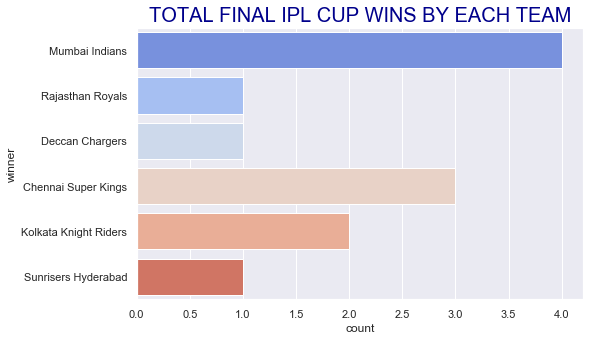

In [78]:

fig=plt.figure(figsize=(8,5))
plt.subplot()
sns.countplot(y='winner',data=season_winner,palette='coolwarm')
plt.title('TOTAL FINAL IPL CUP WINS BY EACH TEAM',fontsize=20,color='darkblue')

In [79]:



m = pd.read_csv("matches.csv")
d = pd.read_csv("deliveries.csv")
# number of players dissmissed by a bowler
ipd1=d.groupby(by='bowler').count()[['player_dismissed']]
#total number of runs given away by the bowler
ipd2=d.groupby(by='bowler').sum()[['total_runs']]
#number of matches played by each player
ipd3=pd.DataFrame(d.groupby(by='bowler')[['match_id']].nunique())
bowler=pd.concat([ipd1,ipd2,ipd3],axis=1)
bowler.shape

(405, 3)

In [80]:
bowler.head()

,player_dismissed,total_runs,match_id
bowler,,,
A Ashish Reddy,19,400,20
A Chandila,11,245,12
A Choudhary,5,144,5
A Dananjaya,0,48,1
A Flintoff,2,106,3


In [81]:
df=m.iloc[[m['win_by_runs'].idxmax()]]
df[['season','team1','team2','winner','win_by_runs']]

,season,team1,team2,winner,win_by_runs
43,2017,Mumbai Indians,Delhi Daredevils,Mumbai Indians,146


 OBSERVATION :MI defeated DD with the highest run difference.

In [82]:
df=m.iloc[[m['win_by_wickets'].idxmax()]]
df[['season','team1','team2','winner','win_by_wickets']]

,season,team1,team2,winner,win_by_wickets
2,2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,10


OBSERVATION: KKR defeated GL with the highest wins by wickets.

In [83]:
for i in range(2008,2020):
    df=((m[m['season']==i]).iloc[-1]) 
    print(df[[1,10]])
#getting the last match in every season since the last match will be the final match for the season

season                2008
winner    Rajasthan Royals
Name: 116, dtype: object
season               2009
winner    Deccan Chargers
Name: 173, dtype: object
season                   2010
winner    Chennai Super Kings
Name: 233, dtype: object
season                   2011
winner    Chennai Super Kings
Name: 306, dtype: object
season                     2012
winner    Kolkata Knight Riders
Name: 380, dtype: object
season              2013
winner    Mumbai Indians
Name: 456, dtype: object
season                     2014
winner    Kolkata Knight Riders
Name: 516, dtype: object
season              2015
winner    Mumbai Indians
Name: 575, dtype: object
season                   2016
winner    Sunrisers Hyderabad
Name: 635, dtype: object
season              2017
winner    Mumbai Indians
Name: 58, dtype: object
season                   2018
winner    Chennai Super Kings
Name: 695, dtype: object
season              2019
winner    Mumbai Indians
Name: 755, dtype: object


 OBSERVATION:This dataframe shows the number of times a team has scored above 200 runs against another team. 


In [84]:
bowler.head()

,player_dismissed,total_runs,match_id
bowler,,,
A Ashish Reddy,19,400,20
A Chandila,11,245,12
A Choudhary,5,144,5
A Dananjaya,0,48,1
A Flintoff,2,106,3


# super over..

In [85]:
print('\n Total Matches with Super Overs:',d[d['is_super_over']==1].match_id.nunique())


 Total Matches with Super Overs: 7


In [86]:
teams=['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW']
play=d[d['is_super_over']==1].batting_team.unique()
play=list(play)
print('Teams who haven"t ever played a super over are:' ,list(set(teams)-set(play)))

Teams who haven"t ever played a super over are: ['CSK', 'GL', 'DD', 'KTK', 'RCB', 'RR', 'PW', 'KKR', 'KXIP', 'RPS', 'DC', 'MI', 'SRH']


# Top 10 highest scores:

In [87]:
high_scores=d.groupby(['match_id', 'inning','batting_team','bowling_team'])['total_runs'].sum().reset_index() 
high_scores=high_scores[high_scores['total_runs']>=150]
high_scores.nlargest(10,'total_runs')

,match_id,inning,batting_team,bowling_team,total_runs
829,411,1,Royal Challengers Bangalore,Pune Warriors,263
1370,7937,1,Kolkata Knight Riders,Kings XI Punjab,250
1250,620,1,Royal Challengers Bangalore,Gujarat Lions,248
416,206,1,Chennai Super Kings,Rajasthan Royals,246
1498,11338,1,Kolkata Knight Riders,Mumbai Indians,241
122,61,1,Chennai Super Kings,Kings XI Punjab,240
1134,562,1,Royal Challengers Bangalore,Mumbai Indians,235
1426,11147,1,Sunrisers Hyderabad,Royal Challengers Bangalore,233
596,296,1,Kings XI Punjab,Royal Challengers Bangalore,232
1500,11339,1,Sunrisers Hyderabad,Kings XI Punjab,232


In [88]:
high=d.groupby(['match_id', 'inning','batting_team','bowling_team'])['total_runs'].sum().reset_index()
high.set_index(['match_id'],inplace=True)
high['total_runs'].max()
high.columns
high=high.rename(columns={'total_runs':'count'})
high=high[high['count']>=200].groupby(['inning','batting_team','bowling_team']).count()
high

count
inning batting_team                bowling_team                      
1      Chennai Super Kings         Delhi Daredevils                 2
                                   Kings XI Punjab                  2
                                   Kolkata Knight Riders            1
                                   Mumbai Indians                   1
                                   Rajasthan Royals                 2
                                   Royal Challengers Bangalore      1
                                   Sunrisers Hyderabad              2
       Deccan Chargers             Rajasthan Royals                 1
       Delhi Capitals              Mumbai Indians                   1
       Delhi Daredevils            Kings XI Punjab                  1
                                   Kolkata Knight Riders            1
                                   Mumbai Indians                   1
                                   Rajasthan Royals                 1
                                   Rising Pune Supergiant           1
       Gujarat Lions               Delhi Daredevils                 1
       Kings XI Punjab             Chennai Super Kings              2
                                   Mumbai Indians                   2
                                   Rajasthan Royals                 2
                                   Royal Challengers Bangalore      2
                                   Sunrisers Hyderabad              1
       Kolkata Knight Riders       Chennai Super Kings              1
                                   Deccan Chargers                  1
                                   Delhi Daredevils                 1
                                   Kings XI Punjab                  4
                                   Mumbai Indians                   1
                                   Royal Challengers Bangalore      1
       Mumbai Indians              Chennai Super Kings              1
                                   Delhi Daredevils                 5
                                   Kolkata Knight Riders            1
                                   Rajasthan Royals                 1
...                                                               ...
       Royal Challengers Bangalore Pune Warriors                    1
                                   Rajasthan Royals                 1
                                   Sunrisers Hyderabad              2
       Sunrisers Hyderabad         Kings XI Punjab                  3
                                   Kolkata Knight Riders            1
                                   Rajasthan Royals                 1
                                   Royal Challengers Bangalore      3
2      Chennai Super Kings         Kings XI Punjab                  2
                                   Kolkata Knight Riders            1
                                   Rajasthan Royals                 1
                                   Royal Challengers Bangalore      2
       Delhi Daredevils            Chennai Super Kings              1
                                   Gujarat Lions                    1
       Kings XI Punjab             Chennai Super Kings              2
                                   Delhi Daredevils                 1
                                   Kolkata Knight Riders            2
                                   Sunrisers Hyderabad              1
       Kolkata Knight Riders       Kings XI Punjab                  1
                                   Royal Challengers Bangalore      2
       Mumbai Indians              Chennai Super Kings              1
                                   Kings XI Punjab                  2
                                   Kolkata Knight Riders            1
       Rajasthan Royals            Chennai Super Kings              1
                                   Deccan Chargers                  1
                                   Mumbai Indians                   1
    

In [89]:
df=m.iloc[[m['win_by_runs'].idxmax()]]
df[['season','team1','team2','winner','win_by_runs']]

,season,team1,team2,winner,win_by_runs
43,2017,Mumbai Indians,Delhi Daredevils,Mumbai Indians,146


 OBSERVATION :MI defeated DD with the highest run difference.

In [90]:
df=m.iloc[[m['win_by_wickets'].idxmax()]]
df[['season','team1','team2','winner','win_by_wickets']]

,season,team1,team2,winner,win_by_wickets
2,2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,10


OBSERVATION: KKR defeated GL with the highest wins by wickets.

In [91]:



m = pd.read_csv("matches.csv")
d = pd.read_csv("deliveries.csv")
# number of players dissmissed by a bowler
ipd1=d.groupby(by='bowler').count()[['player_dismissed']]
#total number of runs given away by the bowler
ipd2=d.groupby(by='bowler').sum()[['total_runs']]
#number of matches played by each player
ipd3=pd.DataFrame(d.groupby(by='bowler')[['match_id']].nunique())
bowler=pd.concat([ipd1,ipd2,ipd3],axis=1)
bowler.shape

(405, 3)

# super over..

In [92]:
print('\n Total Matches with Super Overs:',d[d['is_super_over']==1].match_id.nunique())


 Total Matches with Super Overs: 7


In [93]:
teams=['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW']
play=d[d['is_super_over']==1].batting_team.unique()
play=list(play)
print('Teams who haven"t ever played a super over are:' ,list(set(teams)-set(play)))

Teams who haven"t ever played a super over are: ['CSK', 'GL', 'DD', 'KTK', 'RCB', 'RR', 'PW', 'KKR', 'KXIP', 'RPS', 'DC', 'MI', 'SRH']


# Top 10 highest scores:

In [94]:
high_scores=d.groupby(['match_id', 'inning','batting_team','bowling_team'])['total_runs'].sum().reset_index() 
high_scores=high_scores[high_scores['total_runs']>=150]
high_scores.nlargest(10,'total_runs')

,match_id,inning,batting_team,bowling_team,total_runs
829,411,1,Royal Challengers Bangalore,Pune Warriors,263
1370,7937,1,Kolkata Knight Riders,Kings XI Punjab,250
1250,620,1,Royal Challengers Bangalore,Gujarat Lions,248
416,206,1,Chennai Super Kings,Rajasthan Royals,246
1498,11338,1,Kolkata Knight Riders,Mumbai Indians,241
122,61,1,Chennai Super Kings,Kings XI Punjab,240
1134,562,1,Royal Challengers Bangalore,Mumbai Indians,235
1426,11147,1,Sunrisers Hyderabad,Royal Challengers Bangalore,233
596,296,1,Kings XI Punjab,Royal Challengers Bangalore,232
1500,11339,1,Sunrisers Hyderabad,Kings XI Punjab,232


# The number of times a team has scored above 200 runs against another team. 


In [95]:
for i in range(2008,2020):
    df=((m[m['season']==i]).iloc[-1]) 
    print(df[[1,10]])
#getting the last match in every season since the last match will be the final match for the season

season                2008
winner    Rajasthan Royals
Name: 116, dtype: object
season               2009
winner    Deccan Chargers
Name: 173, dtype: object
season                   2010
winner    Chennai Super Kings
Name: 233, dtype: object
season                   2011
winner    Chennai Super Kings
Name: 306, dtype: object
season                     2012
winner    Kolkata Knight Riders
Name: 380, dtype: object
season              2013
winner    Mumbai Indians
Name: 456, dtype: object
season                     2014
winner    Kolkata Knight Riders
Name: 516, dtype: object
season              2015
winner    Mumbai Indians
Name: 575, dtype: object
season                   2016
winner    Sunrisers Hyderabad
Name: 635, dtype: object
season              2017
winner    Mumbai Indians
Name: 58, dtype: object
season                   2018
winner    Chennai Super Kings
Name: 695, dtype: object
season              2019
winner    Mumbai Indians
Name: 755, dtype: object


In [96]:
high=d.groupby(['match_id', 'inning','batting_team','bowling_team'])['total_runs'].sum().reset_index()
high.set_index(['match_id'],inplace=True)
high['total_runs'].max()
high.columns
high=high.rename(columns={'total_runs':'count'})
high=high[high['count']>=200].groupby(['inning','batting_team','bowling_team']).count()
high

count
inning batting_team                bowling_team                      
1      Chennai Super Kings         Delhi Daredevils                 2
                                   Kings XI Punjab                  2
                                   Kolkata Knight Riders            1
                                   Mumbai Indians                   1
                                   Rajasthan Royals                 2
                                   Royal Challengers Bangalore      1
                                   Sunrisers Hyderabad              2
       Deccan Chargers             Rajasthan Royals                 1
       Delhi Capitals              Mumbai Indians                   1
       Delhi Daredevils            Kings XI Punjab                  1
                                   Kolkata Knight Riders            1
                                   Mumbai Indians                   1
                                   Rajasthan Royals                 1
                                   Rising Pune Supergiant           1
       Gujarat Lions               Delhi Daredevils                 1
       Kings XI Punjab             Chennai Super Kings              2
                                   Mumbai Indians                   2
                                   Rajasthan Royals                 2
                                   Royal Challengers Bangalore      2
                                   Sunrisers Hyderabad              1
       Kolkata Knight Riders       Chennai Super Kings              1
                                   Deccan Chargers                  1
                                   Delhi Daredevils                 1
                                   Kings XI Punjab                  4
                                   Mumbai Indians                   1
                                   Royal Challengers Bangalore      1
       Mumbai Indians              Chennai Super Kings              1
                                   Delhi Daredevils                 5
                                   Kolkata Knight Riders            1
                                   Rajasthan Royals                 1
...                                                               ...
       Royal Challengers Bangalore Pune Warriors                    1
                                   Rajasthan Royals                 1
                                   Sunrisers Hyderabad              2
       Sunrisers Hyderabad         Kings XI Punjab                  3
                                   Kolkata Knight Riders            1
                                   Rajasthan Royals                 1
                                   Royal Challengers Bangalore      3
2      Chennai Super Kings         Kings XI Punjab                  2
                                   Kolkata Knight Riders            1
                                   Rajasthan Royals                 1
                                   Royal Challengers Bangalore      2
       Delhi Daredevils            Chennai Super Kings              1
                                   Gujarat Lions                    1
       Kings XI Punjab             Chennai Super Kings              2
                                   Delhi Daredevils                 1
                                   Kolkata Knight Riders            2
                                   Sunrisers Hyderabad              1
       Kolkata Knight Riders       Kings XI Punjab                  1
                                   Royal Challengers Bangalore      2
       Mumbai Indians              Chennai Super Kings              1
                                   Kings XI Punjab                  2
                                   Kolkata Knight Riders            1
       Rajasthan Royals            Chennai Super Kings              1
                                   Deccan Chargers                  1
                                   Mumbai Indians                   1
    

 OBSERVATION:This dataframe shows the number of times a team has scored above 200 runs against another team. 


# TOP 10 PLAYERS WITH MOST "MAN OF THE MATCH" AWARDAS

<Figure size 1332x756 with 0 Axes>

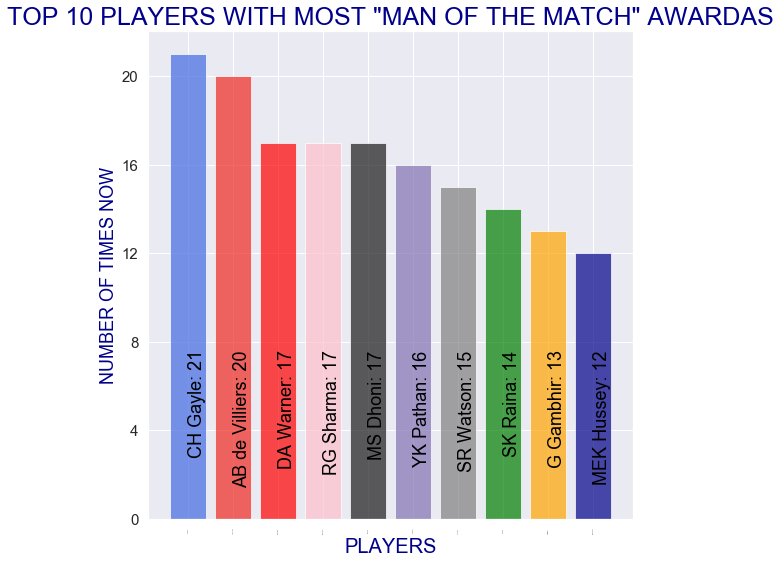

In [97]:
players=pd.DataFrame(m['player_of_match'].value_counts())
players['name']=players.index
players=players.head(10)
fig=plt.gcf()
fig.set_size_inches(18.5,10.5)
plt.figure(figsize=(10,8))

plt.xticks(rotation=90,fontsize=0)
plt.yticks([0,4,8,12,16,20,24],[0,4,8,12,16,20,24],fontsize=15)
plt.bar(players['name'], players['player_of_match'],
        color=['royalblue','#EF2920','red','pink','k','m',
               'gray','green','orange','darkblue'],alpha=0.7)
count=0
for i in players['player_of_match']:
    plt.text(count,7,players['name'][count]+': '+str(i),rotation=90,color='black',size=18)
    count+=1
plt.title('TOP 10 PLAYERS WITH MOST "MAN OF THE MATCH" AWARDAS',fontsize=25,color='darkblue')
plt.xlabel('PLAYERS',fontsize=20,color='darkblue')
plt.ylabel('NUMBER OF TIMES NOW',fontsize=18,color='darkblue')
plt.tight_layout()
plt.show()

In [98]:
#Eliminating redundancy
#There were two entries for the same city as 'Bangalore' and 'Bengaluru'
m.at[m['city']=='Bengaluru','city']='Bangalore'

# Matches hosted in each city
Mumbai has hosted most no. of matches by far(101).
As expected, top 8 cities are home grounds for the teams.

<Figure size 1332x648 with 0 Axes>

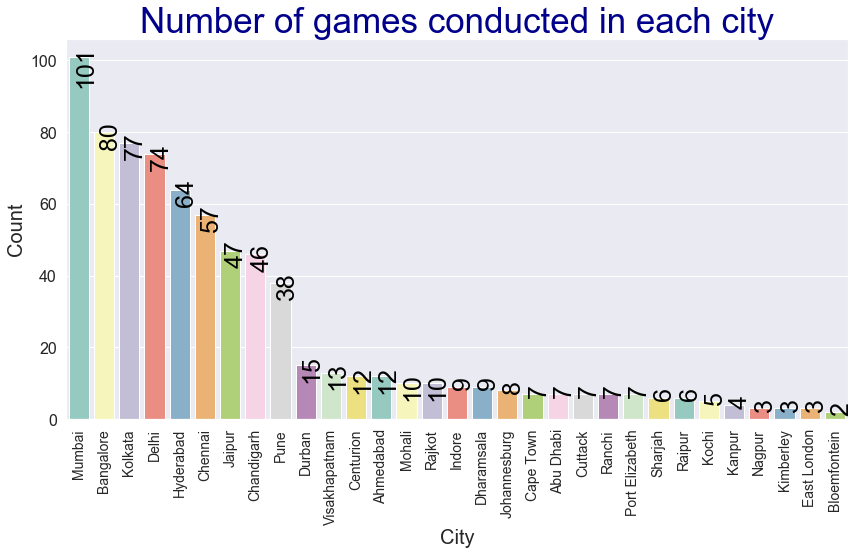

In [99]:
fig=plt.gcf()
fig.set_size_inches(18.5,9)
plt.figure(figsize=(14,7))
sns.countplot(m['city'],order=m['city'].value_counts().index,palette='Set3')
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=16)
plt.xlabel('City',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.title('Number of games conducted in each city',fontsize=35,color='darkblue')
count=0
cities=pd.DataFrame(m['city'].value_counts())
cities['name']=m['city'].value_counts().index
for i in cities['city']:
    plt.text(count-0.2,i-2,str(i),rotation=90,color='black',size=25)
    count+=1
plt.show()

# No. of matches hosted at each stadium
Eden Gardens(Kolkata) has hosted most no. of IPL matches(77)
Wankhede and Chinnaswamy tied at no. 2 with 73 matches each.

<Figure size 1332x756 with 0 Axes>

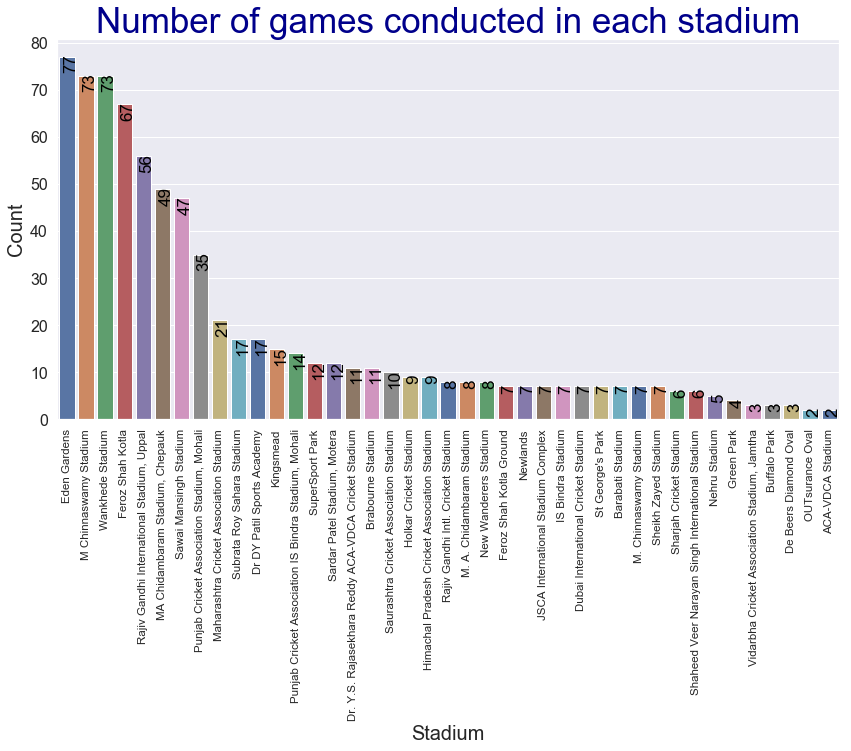

In [100]:
fig=plt.gcf()
fig.set_size_inches(18.5,10.5)
plt.figure(figsize=(14,7))
sns.countplot(m['venue'],order=m['venue'].value_counts().index,palette='deep')
plt.xticks(rotation=90,fontsize=11.5)
plt.yticks(fontsize=16)
plt.xlabel('Stadium',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.title('Number of games conducted in each stadium',fontsize=35,color='darkblue')
count=0
venues=pd.DataFrame(m['venue'].value_counts())
venues['name']=m['venue'].value_counts().index
for i in venues['venue']:
    plt.text(count-0.2,i-2,str(i),rotation=90,color='black',size=17)
    count+=1
plt.show()


In [101]:
micsk=m[np.logical_or(np.logical_and(m['team1']=='Mumbai Indians',m['team2']=='Chennai Super Kings'),np.logical_and(m['team2']=='Mumbai Indians',m['team1']=='Chennai Super Kings'))]

# MI vs CSK head to head

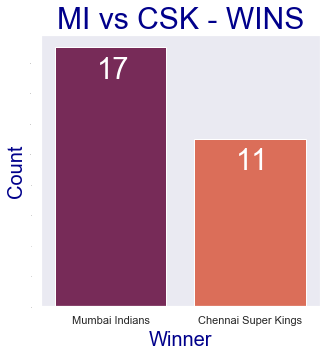

In [50]:
sns.set(style='dark')
plt.figure(figsize=(5,5))
fig.set_size_inches(5,5)
sns.countplot(micsk['winner'],order=micsk['winner'].value_counts().index,palette='rocket')
plt.text(-0.1,15,str(micsk['winner'].value_counts()['Mumbai Indians']),size=29,color='white')
plt.text(0.9,9,str(micsk['winner'].value_counts()['Chennai Super Kings']),size=29,color='white')
plt.xlabel('Winner',fontsize=20,color='darkblue')
plt.ylabel('Count',fontsize=20,color='darkblue')
plt.yticks(fontsize=0)
plt.title('MI vs CSK - WINS',fontsize=30,color='darkblue')
plt.show()


# MI vs CSK - Best performers

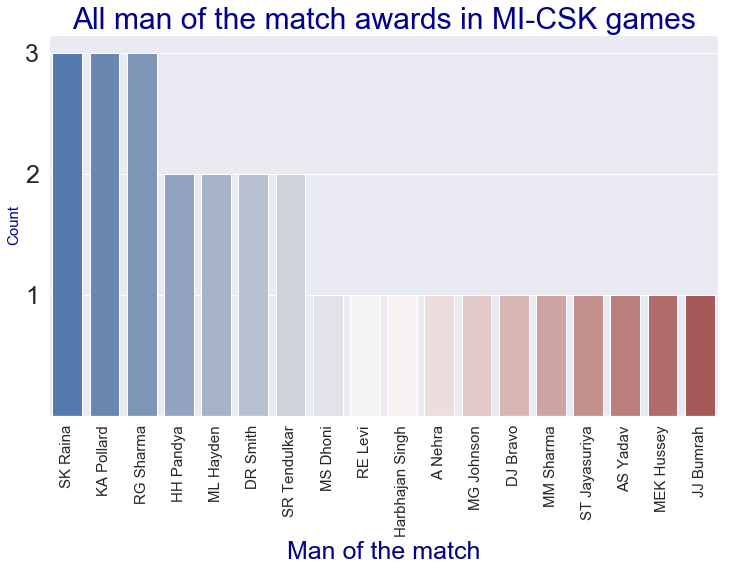

In [51]:
sns.set(style='darkgrid')
plt.figure(figsize=(12,7))
fig.set_size_inches(18.5,8)
sns.countplot(micsk['player_of_match'],order=micsk['player_of_match'].value_counts().index,palette='vlag')
plt.title('All man of the match awards in MI-CSK games',fontsize=30,color='darkblue')
plt.yticks([1,2,3],[1,2,3],fontsize=25)
plt.xticks(fontsize=15,rotation=90)
plt.xlabel('Man of the match',fontsize=25,color='darkblue')
plt.ylabel('Count',fontsize=15,color='darkblue')
plt.show()

# Toss decision statistics for all MIvCSK matches - Venue wise


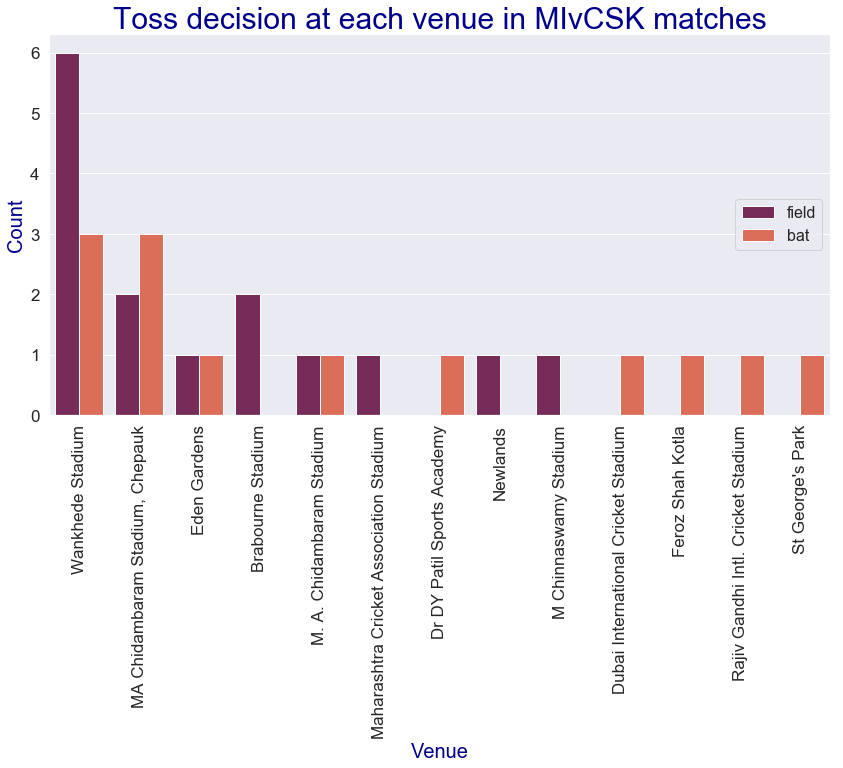

In [53]:
sns.set(style='darkgrid')
plt.figure(figsize=(14,7))
fig.set_size_inches(18.5,8)
sns.countplot(micsk['venue'],order=micsk['venue'].value_counts().index,palette='rocket',hue=m['toss_decision'])
plt.title('Toss decision at each venue in MIvCSK matches',fontsize=30,color='darkblue')
plt.yticks(fontsize=17)
plt.xticks(fontsize=17,rotation=90)
plt.xlabel('Venue',fontsize=20,color='darkblue')
plt.ylabel('Count',fontsize=20,color='darkblue')
plt.legend(loc=5,fontsize=16)
plt.show()

# Decision upon winning the toss by both teams
MI tends to bat first(53% of the times)
CSK tends to bowl first(62% of the times)

<Figure size 720x576 with 0 Axes>

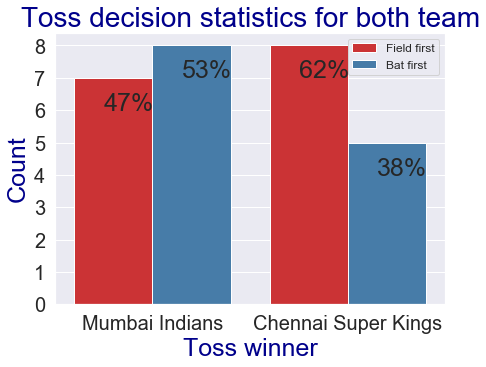

In [55]:
sns.set(style='darkgrid')
fig=plt.gcf()
plt.figure(figsize=(7,5))
fig.set_size_inches(10,8)
sns.countplot(micsk['toss_winner'],order=micsk['toss_winner'].value_counts().index,palette='Set1',hue=m['toss_decision'])
plt.title('Toss decision statistics for both team',fontsize=28,color='darkblue')
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.xlabel('Toss winner',fontsize=25,color='darkblue')
plt.ylabel('Count',fontsize=25,color='darkblue')
plt.text(-0.25,6,str(int((7/15)*100)+1)+'%',fontsize=25)
plt.text(0.15,7,str(int((8/15)*100))+'%',fontsize=25)
plt.text(0.75,7,str(int((8/13)*100)+1)+'%',fontsize=25)
plt.text(1.15,4,str(int((5/13)*100))+'%',fontsize=25)
plt.legend(['Field first','Bat first'],loc='best',fontsize=12)
plt.show()


# IPL Teams: Winning Percentage

In [ ]:
df=matches
df = df[['team1', 'team2', 'winner']]
teams = df.team1.unique()
teams

winPercent = []

for each_team in teams:
    played_matches = np.count_nonzero(df['team1'].astype(str).str.contains(each_team)) + np.count_nonzero(df['team2'].astype(str).str.contains(each_team))
    matches_won = np.count_nonzero(df['winner'].astype(str).str.contains(each_team))   
    winPercent.append(100 * (matches_won / played_matches))
    
winPercent, teams = zip(*sorted(zip(winPercent, teams))) #Sort teams as per winning percentage (Descending order)

plt.figure(figsize=(12,6))
plt.barh(range(len(winPercent)), winPercent, align='center',color='m')
plt.yticks(range(len(winPercent)), teams)
plt.title("IPL Teams: Winning Percentage",fontsize=25,color='darkblue')
plt.show()

# Biggest win by runs each season

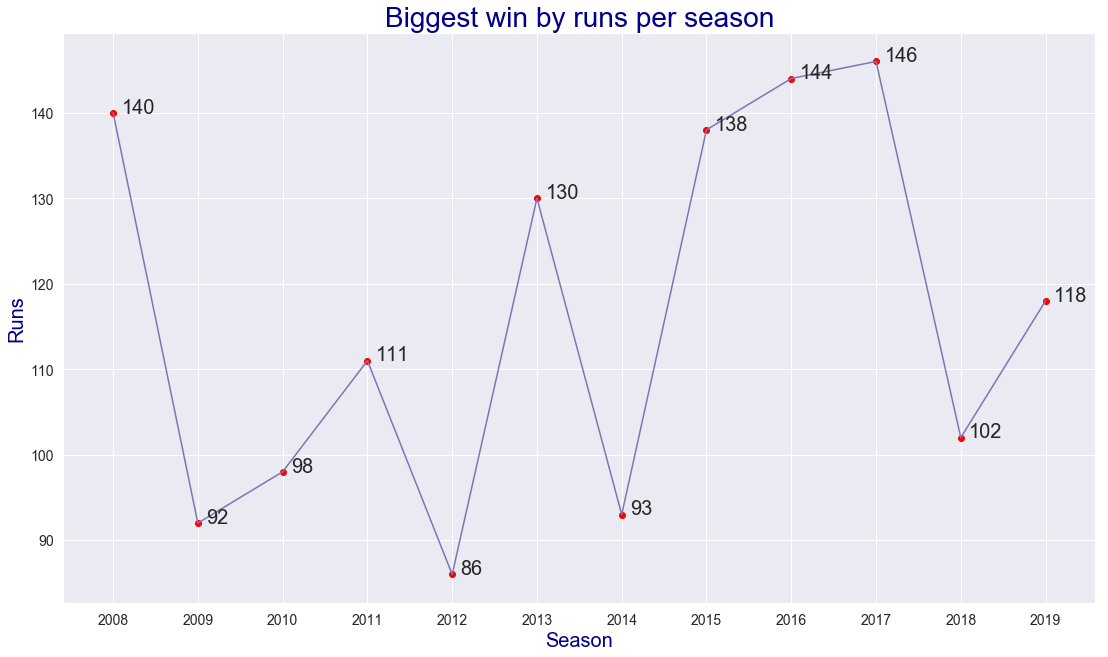

In [57]:
s=2008
season=[]
win_by_runs_max=[]
while s<2020:
    season.append(s)
    win_by_runs_max.append(m[m['season']==s]['win_by_runs'].max())
    s+=1
fig=plt.gcf()
fig.set_size_inches(18.5,10.5)
plt.plot(season,win_by_runs_max,color="m")
plt.scatter(season,win_by_runs_max,color='red')
count=0
while count<12:
    plt.text(season[count]+0.1,win_by_runs_max[count],str(win_by_runs_max[count]),size=20)
    count+=1
plt.xticks(range(2008,2020),fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Season',fontsize=20,color='darkblue')
plt.ylabel('Runs',fontsize=20,color='darkblue')
plt.title('Biggest win by runs per season',fontsize=28,color='darkblue')
plt.show()


# Number of matches played at each Venue.

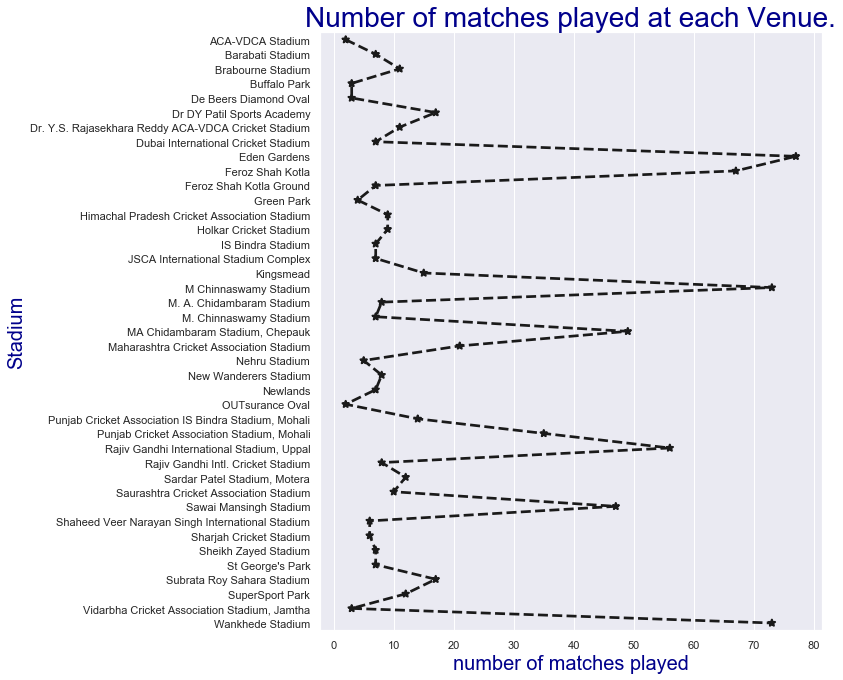

In [58]:

fig, ax = plt.subplots()
fig.set_size_inches(9, 11)
sns.pointplot(y='venue',x='id',data=Matches_at_Venu,figsize=(20,20),linestyles="--",markers='*',color='k')
ax.set_xlabel("number of matches played",fontsize=20,color='darkblue')
ax.set_ylabel("Stadium",fontsize=20,color='darkblue')
plt.title('Number of matches played at each Venue.',fontsize=28,color='darkblue')
plt.show()

# Team  Total Score  and wickets taken by them in all seasons..

In [61]:

ipm1=m.groupby(by='winner').sum()[['win_by_runs','win_by_wickets']]


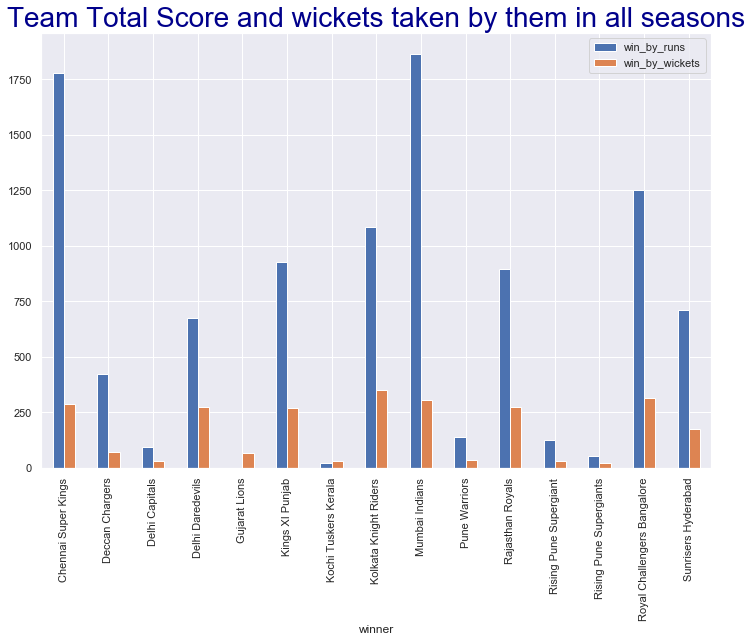

In [62]:

ipm1.plot(kind='bar',figsize=(12,8),grid=True)
plt.title('Team Total Score and wickets taken by them in all seasons',fontsize=28,color='darkblue')
plt.show()


In [63]:
top_scores = d.groupby(["match_id", "batsman","batting_team"])["batsman_runs"].sum().reset_index()
#top_scores=top_scores[top_scores['batsman_runs']>100]
top_scores.sort_values('batsman_runs', ascending=0).head(10)
top_scores.nlargest(10,'batsman_runs')

,match_id,batsman,batting_team,batsman_runs
6200,411,CH Gayle,Royal Challengers Bangalore,175
900,60,BB McCullum,Kolkata Knight Riders,158
8426,562,AB de Villiers,Royal Challengers Bangalore,133
10149,7935,RR Pant,Delhi Daredevils,130
9257,620,AB de Villiers,Royal Challengers Bangalore,129
5585,372,CH Gayle,Royal Challengers Bangalore,128
3135,206,M Vijay,Chennai Super Kings,127
529,36,DA Warner,Sunrisers Hyderabad,126
7752,516,V Sehwag,Kings XI Punjab,122
10417,7953,SR Watson,Chennai Super Kings,121


In [64]:
ipd1=ipl_deliveries.groupby(by='bowler').count()[['player_dismissed']]
#total number of runs given away by the bowler
ipd2=ipl_deliveries.groupby(by='bowler').sum()[['total_runs']]
#number of matches played by each player
ipd3=pd.DataFrame(ipl_deliveries.groupby(by='bowler')[['match_id']].nunique())
bowler=pd.concat([ipd1,ipd2,ipd3],axis=1)

NameError: name 'ipl_deliveries' is not defined

In [65]:

bowler=bowler.sort_values('match_id',ascending=False).reset_index()


In [66]:
bowler.head()

,bowler,player_dismissed,total_runs,match_id
0,Harbhajan Singh,161,4050,157
1,PP Chawla,156,4153,156
2,A Mishra,165,3850,147
3,RA Jadeja,116,3221,142
4,R Ashwin,138,3391,136


In [67]:
z = (bowler.total_runs/(bowler.match_id*6))

In [68]:
#Filtering bowlers according to season
condition = combined.season == 2015
df = combined.loc[condition,:]
#Filtering bowlers that bowled minimum 60 balls
bowler_series = df.groupby([df.bowler]).total_runs.count()
bowler_df = pd.DataFrame(bowler_series)
bowler_df.columns = ['balls']
bowler_df = bowler_df.loc[bowler_df.balls >= 60,:]
condition = df.bowler.isin(bowler_df.index)
df2 = df.loc[condition,:]
df3 = pd.DataFrame(df2.groupby([df2.bowler]).total_runs.mean().sort_values().head(10))
df3.columns = ['Economy']
df3.reset_index()

,bowler,Economy
0,R Ashwin,0.954167
1,Z Khan,1.025806
2,MC Henriques,1.044586
3,MA Starc,1.125000
4,Sandeep Sharma,1.154341
5,GB Hogg,1.165354
6,A Nehra,1.176623
7,JP Duminy,1.196262
8,SL Malinga,1.198413
9,S Aravind,1.200000


# Batting or bowling first after winning toss


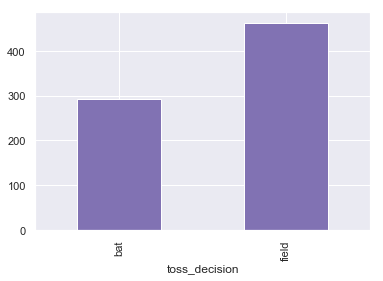

In [69]:
choice_series = m.groupby(m.toss_decision).toss_decision.count()
choice_series.plot(kind='bar',color = 'm')